In [20]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter
from nltk.corpus import stopwords

In [22]:
folder_data = "E:\\Dataset\\liputan6_data2\\"
train_set = pd.read_csv(folder_data+'train_set.csv')

# Stopwords

In [24]:
# download stopword
nltk.download('stopwords')

# Stopwords indonesia
stopwords_indonesia = set(stopwords.words('indonesian'))

# ekstrak stopwords
def extract_stopwords(teks):
    words = teks.split()
    stopwords_in_text = [word for word in words if word.lower() in stopwords_indonesia]
    return ', '.join(stopwords_in_text) if stopwords_in_text else None

# cek teks dan tambahkan kolom stopwords
train_set['stopwords'] = train_set['combined_clean_article'].apply(extract_stopwords)

# cek mengandung stopwords yang tidak null
rows_with_stopwords = train_set[train_set['stopwords'].notnull()]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
rows_with_stopwords

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords
0,100007,https://www.liputan6.com/news/read/100007/terl...,"[['Liputan6', '.', 'com', ',', 'Jayapura', ':'...","[['Kolonel', 'Richard', 'Ginting', 'dinyatakan...","[4, 5]","Liputan6. com, Jayapura: Kolonel Richard Ginti...",Kolonel Richard Ginting dinyatakan terlibat bi...,"dari, ini, dalam, Hal, itu, diungkapkan, usai,..."
1,100013,https://www.liputan6.com/news/read/100013/penc...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Acong', 'dipergoki', 'rekan', 'sesama', 'sa...","[2, 4]","Liputan6. com, Jakarta: Acong ditangkap polisi...",Acong dipergoki rekan sesama satpam membawa ka...,"karena, tempat, dia, bekerja, sebagai, dua, ya..."
2,100023,https://www.liputan6.com/news/read/100023/sby-...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Jamuan', 'makan', 'malam', 'bagi', 'peserta...","[0, 2]","Liputan6. com, Jakarta: Presiden Susilo Bamban...",Jamuan makan malam bagi peserta KAA diadakan d...,"bagi, dan, di, dalam, ini, juga, dari, pihak, ..."
3,100071,https://www.liputan6.com/news/read/100071/peng...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Mereka', 'berdemonstrasi', 'di', 'saat', 'p...","[1, 8]","Liputan6. com, Jakarta: Lebih dari seratus pen...",Mereka berdemonstrasi di saat para delegasi me...,"Lebih, dari, rasa, Tinggi, di, Mereka, yang, y..."
4,100077,https://www.liputan6.com/news/read/100077/mant...,"[['Liputan6', '.', 'com', ',', 'Tangerang', ':...","[['TMM', ',', 'mantan', 'Deputi', 'Kepala', 'B...","[0, 1]","Liputan6. com, Tangerang: Mantan Deputi Kepala...","TMM, mantan Deputi Kepala Badan Penyehatan Per...","pukul, karena, Menurut, Besar, saat, akan, men..."
...,...,...,...,...,...,...,...,...
9995,99732,https://www.liputan6.com/news/read/99732/perpu...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Presiden', 'Susilo', 'Bambang', 'Yudhoyono'...","[0, 2]","Liputan6. com, Jakarta: Presiden Susilo Bamban...",Presiden Susilo Bambang Yudhoyono telah menand...,"telah, dan, di, dan, Hal, itu, diungkapkan, di..."
9996,99921,https://www.liputan6.com/news/read/99921/mahas...,"[['Liputan6', '.', 'com', ',', 'Makassar', ':'...","[['Sejumlah', 'mahasiswa', 'dari', 'Aliansi', ...","[4, 7]","Liputan6. com, Makassar: Sejumlah mahasiswa as...",Sejumlah mahasiswa dari Aliansi Gerakan Peduli...,"Sejumlah, asal, rasa, di, Mereka, pada, tahun,..."
9997,99925,https://www.liputan6.com/news/read/99925/massa...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Massa', 'Front', 'Perjuangan', 'Pemuda', 'I...","[0, 5]","Liputan6. com, Jakarta: Dua kelompok massa, Fr...",Massa Front Perjuangan Pemuda Indonesia (FPPI)...,"Dua, dan, dan, dengan, rasa, di, Namun, yang, ..."
9998,99960,https://www.liputan6.com/news/read/99960/karti...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Sebanyak', 'delapan', 'pelukis', 'wanita', ...","[0, 2, 6]","Liputan6. com, Jakarta: Wanita identik dengan ...",Sebanyak delapan pelukis wanita ikut serta dal...,"dengan, dan, Namun, setiap, tentang, Ini, bisa..."


In [31]:
all_stopwords = ' '.join(rows_with_stopwords['stopwords'].dropna()).split(', ')
stopwords_counter = Counter(all_stopwords)

most_common_stopwords = stopwords_counter.most_common()
print("\nStopwords terbanyak dalam tweet train_set:")
for word, count in most_common_stopwords[:30]:
    print(f"{word}: {count}")


Stopwords terbanyak dalam tweet train_set:
yang: 42024
di: 39681
dan: 28810
dari: 14355
dengan: 14010
ini: 13807
untuk: 11885
itu: 10633
juga: 8838
akan: 8819
dalam: 8725
tidak: 8424
ke: 8174
tak: 6157
pada: 5985
karena: 5376
masih: 4725
mereka: 4628
sudah: 4518
menjadi: 4470
saat: 4376
bisa: 4269
sebagai: 4200
telah: 4099
para: 4092
dua: 4052
adalah: 3902
tersebut: 3838
ada: 3787
hingga: 3669


# Word Count Distribution

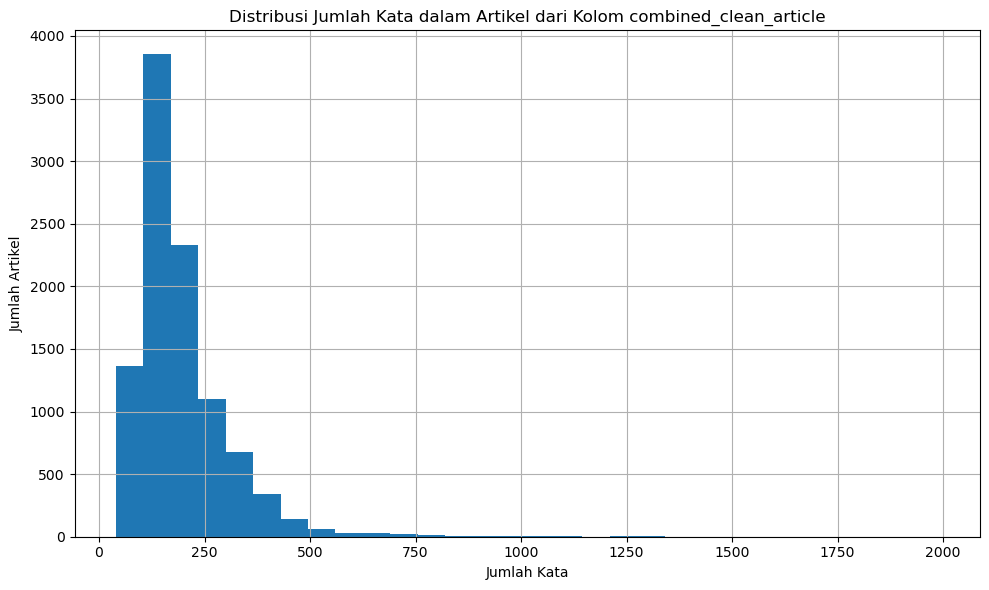

In [34]:
# Menghitung jumlah kata dalam setiap entri kolom 'combined_clean_article'
train_set['word_count'] = train_set['combined_clean_article'].apply(lambda x: len(x.split()))

# Membuat histogram untuk distribusi panjang kata
plt.figure(figsize=(10, 6))
plt.hist(train_set['word_count'], bins=30)
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Artikel')
plt.title('Distribusi Jumlah Kata dalam Artikel dari Kolom combined_clean_article')
plt.grid(True)
plt.tight_layout()
plt.show()

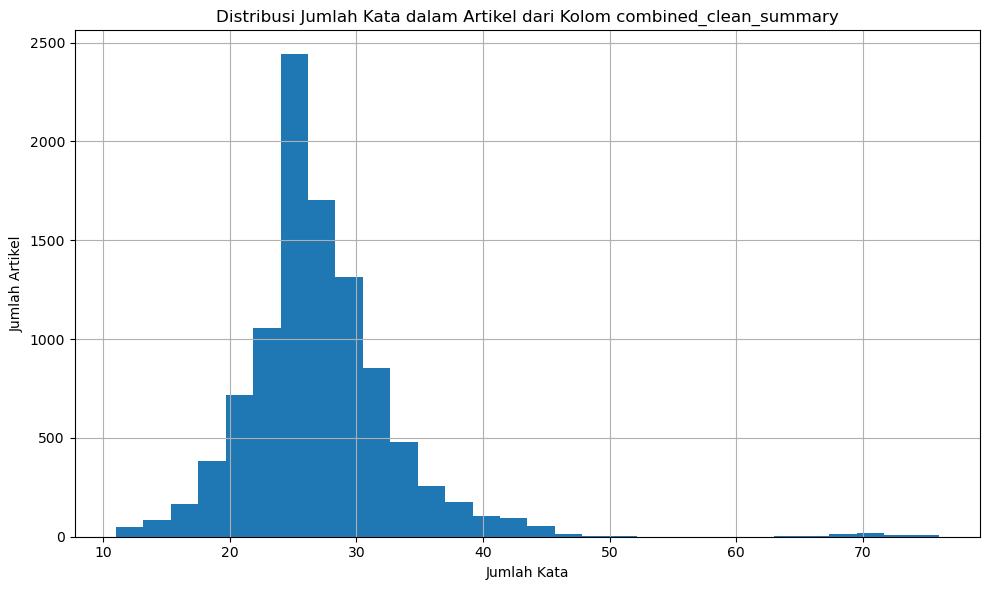

In [36]:
# Menghitung jumlah kata dalam setiap entri kolom 'combined_clean_article'
train_set['word_count'] = train_set['combined_clean_summary'].apply(lambda x: len(x.split()))

# Membuat histogram untuk distribusi panjang kata
plt.figure(figsize=(10, 6))
plt.hist(train_set['word_count'], bins=30)
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Artikel')
plt.title('Distribusi Jumlah Kata dalam Artikel dari Kolom combined_clean_summary')
plt.grid(True)
plt.tight_layout()
plt.show()

# n-gram

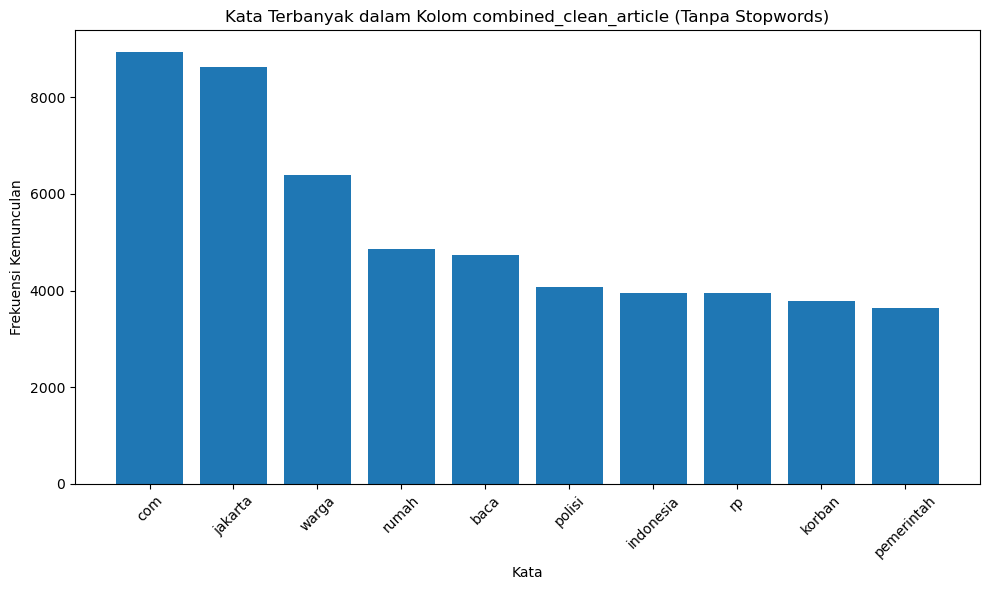

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Load stopwords for Indonesian language
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords and non-alphabetic characters from text
def remove_stopwords_and_non_alpha(text):
    return [word.lower() for word in text if word.lower() not in stop_words and word.isalpha()]

# Combine all texts from 'combined_clean_article'
all_texts = ' '.join(train_set['combined_clean_article'])

# Tokenize and remove stopwords from all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Count word frequencies
word_counts = Counter(filtered_words)

# Get top 10 most common words
top_10_words = word_counts.most_common(10)

# Visualize top 10 words using a bar chart
plt.figure(figsize=(10, 6))
words, counts = zip(*top_10_words)
plt.bar(words, counts)
plt.xlabel('Kata')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Kata Terbanyak dalam Kolom combined_clean_article (Tanpa Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

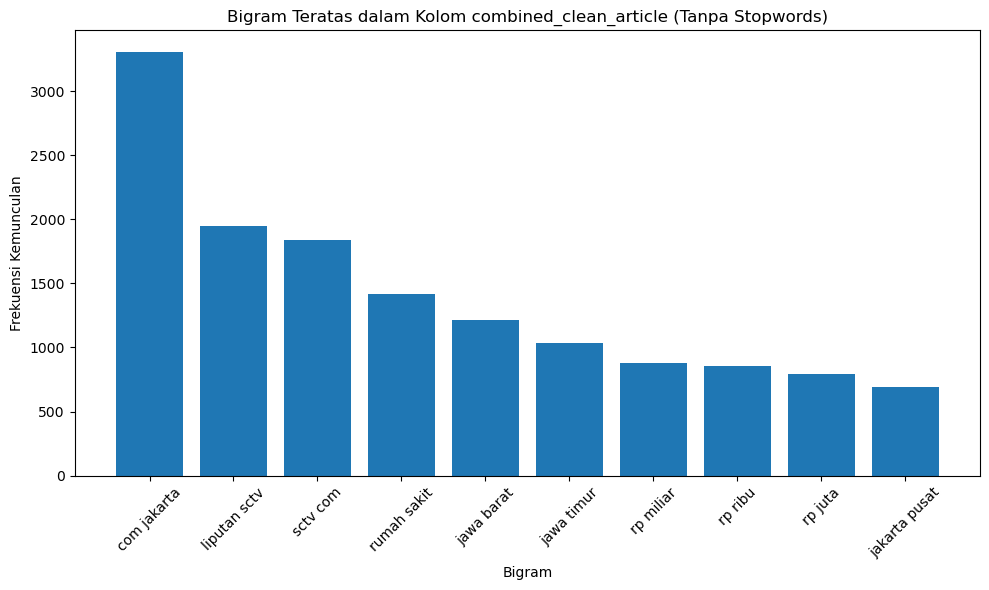

In [40]:
from nltk import ngrams
# Load stopwords for Indonesian language
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords and non-alphabetic characters from text
def remove_stopwords_and_non_alpha(text):
    return [word.lower() for word in text if word.lower() not in stop_words and word.isalpha()]

# Combine all texts from 'combined_clean_article'
all_texts = ' '.join(train_set['combined_clean_article'])

# Tokenize and remove stopwords from all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Generate 2-grams (bigrams)
bigrams = list(ngrams(filtered_words, 2))

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Get top 10 most common bigrams
top_10_bigrams = bigram_counts.most_common(10)

# Visualize top 10 bigrams using a bar chart
plt.figure(figsize=(10, 6))
bigram_labels = [' '.join(bigram) for bigram, count in top_10_bigrams]
bigram_counts = [count for bigram, count in top_10_bigrams]
plt.bar(bigram_labels, bigram_counts)
plt.xlabel('Bigram')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Bigram Teratas dalam Kolom combined_clean_article (Tanpa Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

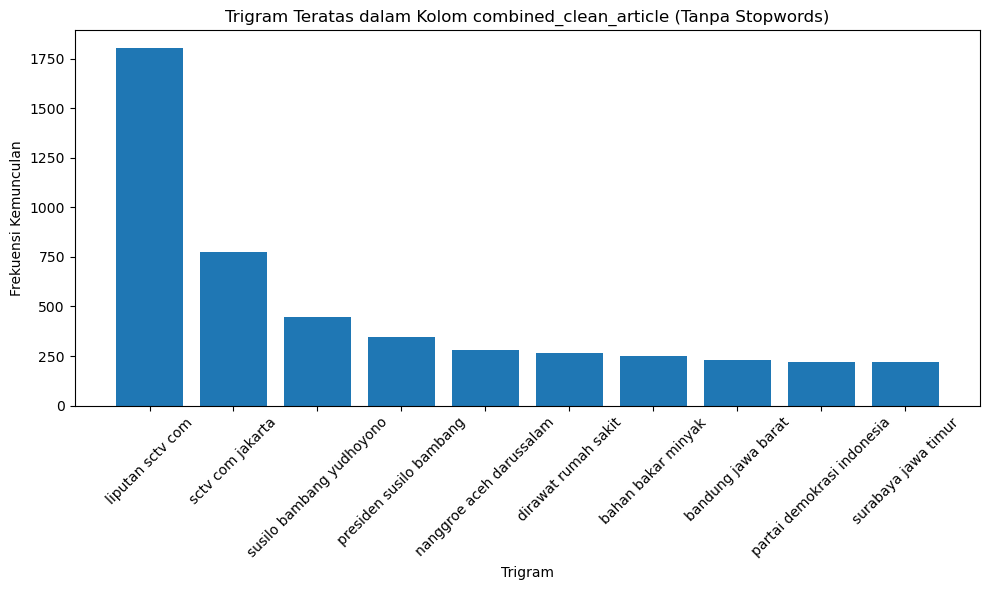

In [42]:
# Load stopwords for Indonesian language
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords and non-alphabetic characters from text
def remove_stopwords_and_non_alpha(text):
    return [word.lower() for word in text if word.lower() not in stop_words and word.isalpha()]

# Combine all texts from 'combined_clean_article'
all_texts = ' '.join(train_set['combined_clean_article'])

# Tokenize and remove stopwords from all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Generate 3-grams (trigrams)
trigrams = list(ngrams(filtered_words, 3))

# Count trigram frequencies
trigram_counts = Counter(trigrams)

# Get top 10 most common trigrams
top_10_trigrams = trigram_counts.most_common(10)

# Visualize top 10 trigrams using a bar chart
plt.figure(figsize=(10, 6))
trigram_labels = [' '.join(trigram) for trigram, count in top_10_trigrams]
trigram_counts = [count for trigram, count in top_10_trigrams]
plt.bar(trigram_labels, trigram_counts)
plt.xlabel('Trigram')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Trigram Teratas dalam Kolom combined_clean_article (Tanpa Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wordcloud

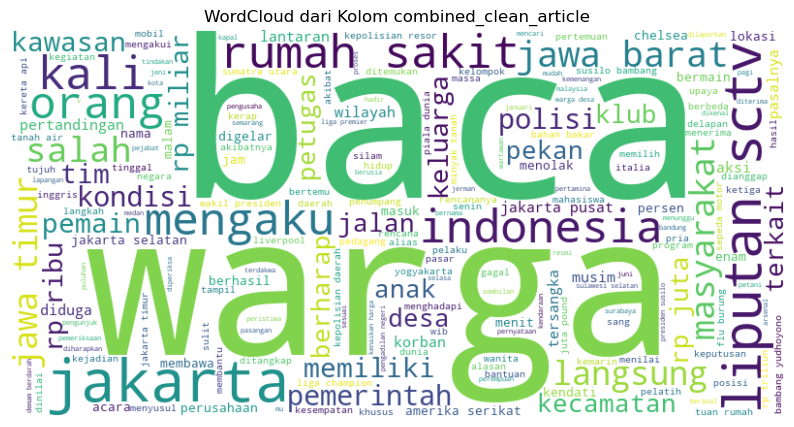

In [44]:
# Combine all texts from 'combined_clean_article'
all_texts = ' '.join(train_set['combined_clean_article'])

# Load stopwords for Indonesian language
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords and non-alphabetic characters from text
def remove_stopwords_and_non_alpha(text):
    return ' '.join([word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and word.isalpha()])

# Apply function to remove stopwords and non-alphabetic characters
processed_text = remove_stopwords_and_non_alpha(all_texts)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Display WordCloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kolom combined_clean_article')
plt.show()

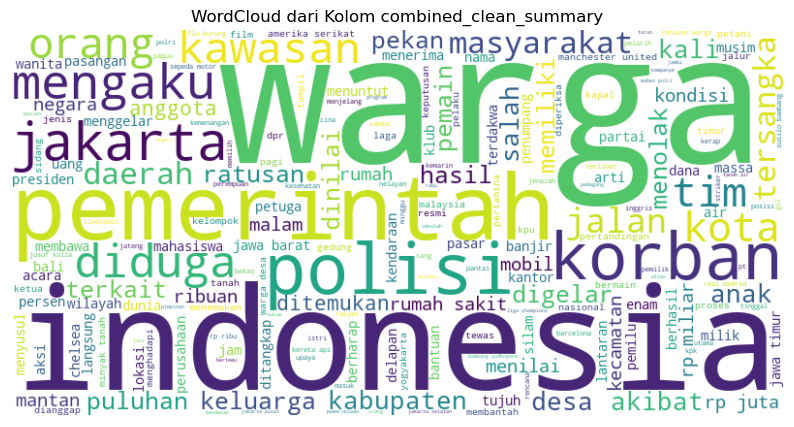

In [45]:
# Combine all texts from 'combined_clean_article'
all_texts = ' '.join(train_set['combined_clean_summary'])

# Load stopwords for Indonesian language
stop_words = set(stopwords.words('indonesian'))

# Function to remove stopwords and non-alphabetic characters from text
def remove_stopwords_and_non_alpha(text):
    return ' '.join([word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and word.isalpha()])

# Apply function to remove stopwords and non-alphabetic characters
processed_text = remove_stopwords_and_non_alpha(all_texts)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Display WordCloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kolom combined_clean_summary')
plt.show()

# Content

In [54]:
def extract_awal_berita(text):
    match = re.search(r'Liputan6\. com, [A-Za-z\s]+:', text)
    return match.group(0) if match else ''

In [56]:
train_set['ekstrak_awal_berita'] = train_set['combined_clean_article'].apply(extract_awal_berita)

In [62]:
train_set['ekstrak_awal_berita'].unique()

array(['Liputan6. com, Jayapura:', 'Liputan6. com, Jakarta:',
       'Liputan6. com, Tangerang:', 'Liputan6. com, Bandung:',
       'Liputan6. com, Ambon:', 'Liputan6. com, Aceh Tenggara:',
       'Liputan6. com, Poso:', 'Liputan6. com, Cianjur:',
       'Liputan6. com, Mamasa:', 'Liputan6. com, Mataram:',
       'Liputan6. com, Maluku Tenggara:', 'Liputan6. com, Tegal:',
       'Liputan6. com, Cilacap:', 'Liputan6. com, Bantul:',
       'Liputan6. com, Madiun:', 'Liputan6. com, Sukabumi:',
       'Liputan6. com, Lamongan:', 'Liputan6. com, Semarang:',
       'Liputan6. com, Serang:', 'Liputan6. com, Banjarmasin:',
       'Liputan6. com, Seoul:', 'Liputan6. com, Medan:',
       'Liputan6. com, Makassar:', 'Liputan6. com, Tanjungpinang:',
       'Liputan6. com, Bandar Lampung:', 'Liputan6. com, Bondowoso:',
       'Liputan6. com, Tenggarong:', 'Liputan6. com, Cilegon:',
       'Liputan6. com, Singapura:', 'Liputan6. com, Karanganyar:',
       'Liputan6. com, Mamuju:', 'Liputan6. com, Be

In [66]:
def extract_hari_tanggal(text):
    match = re.search(r'\w+\s*\(\d{1,2}/\d{1,2}\)', text)
    return match.group(0) if match else ''

train_set['ekstrak_hari_tanggal'] = train_set['combined_clean_article'].apply(extract_hari_tanggal)

In [70]:
train_set[train_set['ekstrak_hari_tanggal'].notnull()].head()

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count,ekstrak_awal_berita,ekstrak_hari_tanggal
0,100007,https://www.liputan6.com/news/read/100007/terl...,"[['Liputan6', '.', 'com', ',', 'Jayapura', ':'...","[['Kolonel', 'Richard', 'Ginting', 'dinyatakan...","[4, 5]","Liputan6. com, Jayapura: Kolonel Richard Ginti...",Kolonel Richard Ginting dinyatakan terlibat bi...,"dari, ini, dalam, Hal, itu, diungkapkan, usai,...",27,"Liputan6. com, Jayapura:",Kamis (21/4)
1,100013,https://www.liputan6.com/news/read/100013/penc...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Acong', 'dipergoki', 'rekan', 'sesama', 'sa...","[2, 4]","Liputan6. com, Jakarta: Acong ditangkap polisi...",Acong dipergoki rekan sesama satpam membawa ka...,"karena, tempat, dia, bekerja, sebagai, dua, ya...",28,"Liputan6. com, Jakarta:",Jumat (22/4)
2,100023,https://www.liputan6.com/news/read/100023/sby-...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Jamuan', 'makan', 'malam', 'bagi', 'peserta...","[0, 2]","Liputan6. com, Jakarta: Presiden Susilo Bamban...",Jamuan makan malam bagi peserta KAA diadakan d...,"bagi, dan, di, dalam, ini, juga, dari, pihak, ...",27,"Liputan6. com, Jakarta:",Jumat (22/4)
3,100071,https://www.liputan6.com/news/read/100071/peng...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Mereka', 'berdemonstrasi', 'di', 'saat', 'p...","[1, 8]","Liputan6. com, Jakarta: Lebih dari seratus pen...",Mereka berdemonstrasi di saat para delegasi me...,"Lebih, dari, rasa, Tinggi, di, Mereka, yang, y...",28,"Liputan6. com, Jakarta:",Sabtu (23/4)
4,100077,https://www.liputan6.com/news/read/100077/mant...,"[['Liputan6', '.', 'com', ',', 'Tangerang', ':...","[['TMM', ',', 'mantan', 'Deputi', 'Kepala', 'B...","[0, 1]","Liputan6. com, Tangerang: Mantan Deputi Kepala...","TMM, mantan Deputi Kepala Badan Penyehatan Per...","pukul, karena, Menurut, Besar, saat, akan, men...",24,"Liputan6. com, Tangerang:",Jumat (22/4)


In [84]:
def extract_nama_penulis(text):
    match = re.search(r'\([A-Z]+/[A-Za-z\s]+(?: dan [A-Za-z\s]+)?\)\.', text)
    return match.group(0) if match else None

train_set['ekstrak_nama_penulis'] = train_set['combined_clean_article'].apply(extract_nama_penulis)

In [86]:
train_set[train_set['ekstrak_nama_penulis'].notnull()].head()

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count,ekstrak_awal_berita,ekstrak_hari_tanggal,ekstrak_nama_penulis,ekstrak_baca
0,100007,https://www.liputan6.com/news/read/100007/terl...,"[['Liputan6', '.', 'com', ',', 'Jayapura', ':'...","[['Kolonel', 'Richard', 'Ginting', 'dinyatakan...","[4, 5]","Liputan6. com, Jayapura: Kolonel Richard Ginti...",Kolonel Richard Ginting dinyatakan terlibat bi...,"dari, ini, dalam, Hal, itu, diungkapkan, usai,...",27,"Liputan6. com, Jayapura:",Kamis (21/4),(AWD/Ruba i Kadir).,"[baca: Hutanku Hijau, Hutanku Terus Dibabat]"
1,100013,https://www.liputan6.com/news/read/100013/penc...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Acong', 'dipergoki', 'rekan', 'sesama', 'sa...","[2, 4]","Liputan6. com, Jakarta: Acong ditangkap polisi...",Acong dipergoki rekan sesama satpam membawa ka...,"karena, tempat, dia, bekerja, sebagai, dua, ya...",28,"Liputan6. com, Jakarta:",Jumat (22/4),(TNA/Satriana Budi dan Budi Sukmadianto).,
2,100023,https://www.liputan6.com/news/read/100023/sby-...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Jamuan', 'makan', 'malam', 'bagi', 'peserta...","[0, 2]","Liputan6. com, Jakarta: Presiden Susilo Bamban...",Jamuan makan malam bagi peserta KAA diadakan d...,"bagi, dan, di, dalam, ini, juga, dari, pihak, ...",27,"Liputan6. com, Jakarta:",Jumat (22/4),(MAK/Mikotoro dan Doni Indradi).,[baca: Presiden Yudhoyono Bertemu Sekjen PBB]
4,100077,https://www.liputan6.com/news/read/100077/mant...,"[['Liputan6', '.', 'com', ',', 'Tangerang', ':...","[['TMM', ',', 'mantan', 'Deputi', 'Kepala', 'B...","[0, 1]","Liputan6. com, Tangerang: Mantan Deputi Kepala...","TMM, mantan Deputi Kepala Badan Penyehatan Per...","pukul, karena, Menurut, Besar, saat, akan, men...",24,"Liputan6. com, Tangerang:",Jumat (22/4),(YYT/Grace Natalie dan Dwi Guntoro).,
5,100098,https://www.liputan6.com/news/read/100098/hasi...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Menurut', 'Ketua', 'Komisi', 'III', 'DPR', ...","[3, 4]","Liputan6. com, Jakarta: Ketua Komisi III DPR T...","Menurut Ketua Komisi III DPR Teras Narang, has...","telah, siap, terhadap, Umum, kepada, itu, suda...",31,"Liputan6. com, Jakarta:",Sabtu (23/4),(ORS/Mikotoro dan Satya Pandia).,[baca: Rp 90 Miliar Penyimpangan pada Pemilu L...


In [88]:
def extract_baca(text):
    match = re.search(r'\[baca: .*?\]', text)
    return match.group(0) if match else None

train_set['ekstrak_baca'] = train_set['combined_clean_article'].apply(extract_baca)

In [90]:
train_set[train_set['ekstrak_baca'].notnull()].head()

,id,url,clean_article,clean_summary,extractive_summary,combined_clean_article,combined_clean_summary,stopwords,word_count,ekstrak_awal_berita,ekstrak_hari_tanggal,ekstrak_nama_penulis,ekstrak_baca
0,100007,https://www.liputan6.com/news/read/100007/terl...,"[['Liputan6', '.', 'com', ',', 'Jayapura', ':'...","[['Kolonel', 'Richard', 'Ginting', 'dinyatakan...","[4, 5]","Liputan6. com, Jayapura: Kolonel Richard Ginti...",Kolonel Richard Ginting dinyatakan terlibat bi...,"dari, ini, dalam, Hal, itu, diungkapkan, usai,...",27,"Liputan6. com, Jayapura:",Kamis (21/4),(AWD/Ruba i Kadir).,"[baca: Hutanku Hijau, Hutanku Terus Dibabat]"
2,100023,https://www.liputan6.com/news/read/100023/sby-...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Jamuan', 'makan', 'malam', 'bagi', 'peserta...","[0, 2]","Liputan6. com, Jakarta: Presiden Susilo Bamban...",Jamuan makan malam bagi peserta KAA diadakan d...,"bagi, dan, di, dalam, ini, juga, dari, pihak, ...",27,"Liputan6. com, Jakarta:",Jumat (22/4),(MAK/Mikotoro dan Doni Indradi).,[baca: Presiden Yudhoyono Bertemu Sekjen PBB]
3,100071,https://www.liputan6.com/news/read/100071/peng...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Mereka', 'berdemonstrasi', 'di', 'saat', 'p...","[1, 8]","Liputan6. com, Jakarta: Lebih dari seratus pen...",Mereka berdemonstrasi di saat para delegasi me...,"Lebih, dari, rasa, Tinggi, di, Mereka, yang, y...",28,"Liputan6. com, Jakarta:",Sabtu (23/4),None,[baca: Aksi Damai Falun Gong Digelar di Jakarta]
5,100098,https://www.liputan6.com/news/read/100098/hasi...,"[['Liputan6', '.', 'com', ',', 'Jakarta', ':',...","[['Menurut', 'Ketua', 'Komisi', 'III', 'DPR', ...","[3, 4]","Liputan6. com, Jakarta: Ketua Komisi III DPR T...","Menurut Ketua Komisi III DPR Teras Narang, has...","telah, siap, terhadap, Umum, kepada, itu, suda...",31,"Liputan6. com, Jakarta:",Sabtu (23/4),(ORS/Mikotoro dan Satya Pandia).,[baca: Rp 90 Miliar Penyimpangan pada Pemilu L...
6,100100,https://www.liputan6.com/news/read/100100/napa...,"[['Liputan6', '.', 'com', ',', 'Bandung', ':',...","[['Presiden', 'Yudhoyono', ',', 'Sekjen', 'PBB...","[8, 10]","Liputan6. com, Bandung: Setelah mengikuti Konf...","Presiden Yudhoyono, Sekjen PBB Kofi Annan dan ...","Setelah, Tinggi, sekitar, dalam, tahun, di, ta...",28,"Liputan6. com, Bandung:",Ahad (24/4),None,[baca: Mengulang Semangat KAA Bandung]
